# Udacity traffic light classification for Capstone

In [51]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [52]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10909719476531671343
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7318942516
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7313459104981188530
physical_device_desc: "device: 0, name: GeForce GTX 1070 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [53]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [54]:
import glob
import cv2
X = []
y = []
folders = ['not_red', 'red']
for label, folder in enumerate(folders):
    print (label, folder)
    for i, img in enumerate(glob.glob('/home/santosh/DL/traffic_lights/dataset/train/'+folder+'/*.jpg')):
        #print (i)
        image = cv2.imread(img)
        X.append(image)
        y.append(label)

0 not_red
1 red


In [55]:
X = np.asarray(X)
y = np.asarray(y)
print (X.shape)
print (y.shape)

(2791, 256, 256, 3)
(2791,)


In [56]:
print (len(X))

2791


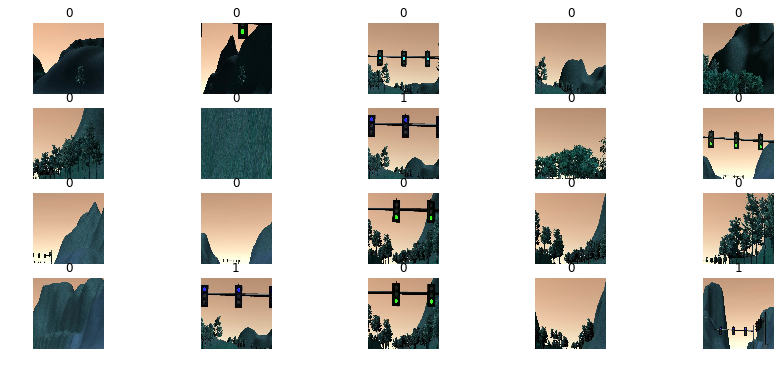

In [57]:
import random

fig, axs = plt.subplots(4,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(20):
    index = random.randint(0, len(X))
    image = X[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y[index])

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [59]:
#Check
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (2093, 256, 256, 3)
y_train shape (2093,)
X_test shape (698, 256, 256, 3)
y_test shape (698,)


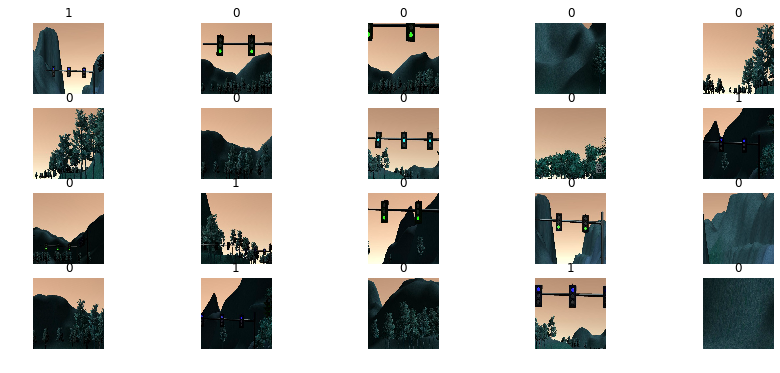

In [60]:
fig, axs = plt.subplots(4,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(20):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])

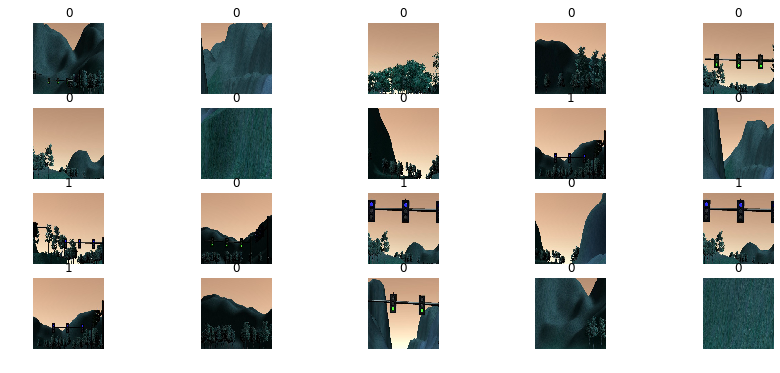

In [61]:
fig, axs = plt.subplots(4,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(20):
    index = random.randint(0, len(X_test))
    image = X_test[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_test[index])

In [62]:
def createModel():
    classifier1 = Sequential()#Initialize 

    classifier1.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='same', input_shape=(256, 256, 3), activation='relu'))
    classifier1.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='same', activation='relu'))
    classifier1.add(MaxPooling2D(pool_size=(2,2)))
    classifier1.add(Dropout(0.5))
    classifier1.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='same', activation='relu'))
    classifier1.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='same', activation='relu'))
    classifier1.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='same', activation='relu'))
    classifier1.add(MaxPooling2D(pool_size=(2,2)))
    classifier1.add(Dropout(0.5))
    classifier1.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='same', activation='relu'))
    classifier1.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='same', activation='relu'))
    classifier1.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='same', activation='relu'))
    classifier1.add(MaxPooling2D(pool_size=(2,2)))
    classifier1.add(Dropout(0.5))
    classifier1.add(Flatten())
    classifier1.add(Dense(units=128, activation='relu'))
    classifier1.add(Dropout(0.5))
    classifier1.add(Dense(units=64, activation='relu'))
    classifier1.add(Dense(units=32, activation='relu'))
    classifier1.add(Dense(units=nClasses, activation='sigmoid'))
    
    return classifier1

In [63]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of classes : ', nClasses)
print('Output classes : ', classes)

Total number of classes :  2
Output classes :  [0 1]


In [64]:
from keras.utils import to_categorical
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(y_train)
test_labels_one_hot = to_categorical(y_test)

In [65]:
print (train_labels_one_hot)
print (test_labels_one_hot)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


(256, 256, 3)
(2093, 256, 256, 3)
(698, 256, 256, 3)


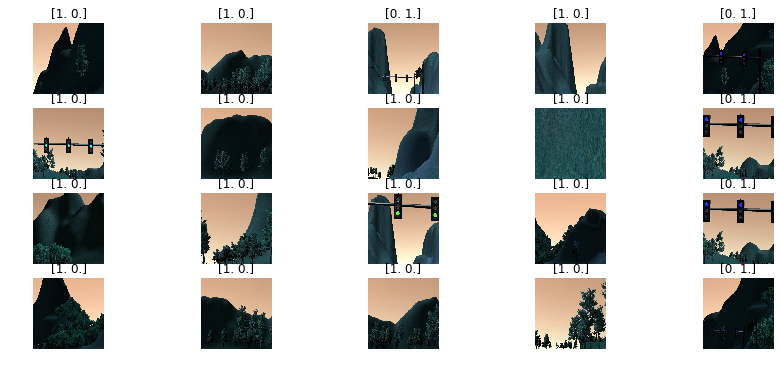

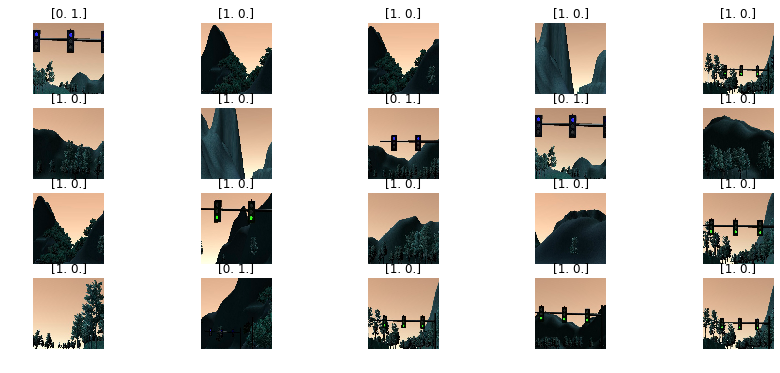

In [66]:
# Find the shape of input images and create the variable input_shape
nRows,nCols,nDims = X_train.shape[1:]
train_data = X_train.reshape(X_train.shape[0], nRows, nCols, nDims)
test_data = X_test.reshape(X_test.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)
print (input_shape)


# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

print (train_data.shape)

fig, axs = plt.subplots(4,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(20):
    index = random.randint(0, len(X_train))
    image = train_data[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(train_labels_one_hot[index])
    
print (test_data.shape)
fig, axs = plt.subplots(4,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(20):
    index = random.randint(0, len(X_test))
    image = test_data[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(test_labels_one_hot[index])

In [67]:
from keras.preprocessing.image import ImageDataGenerator

model1 = createModel()

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

batch_size = 64
epochs = 200
datagen = ImageDataGenerator(
        zoom_range=0.2, # randomly zoom into images
        shear_range=0.2,
        #rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images


# datagen.fit(train_data)

# Fit the model on the batches generated by datagen.flow().
history1 = model1.fit_generator(datagen.flow(train_data, train_labels_one_hot, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(train_data.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(test_data, test_labels_one_hot),
                              workers=4)

model1.evaluate(test_data, test_labels_one_hot)

Epoch 1/200
33/33 [==============================] - 11s 319ms/step - loss: 0.5466 - acc: 0.8028 - val_loss: 0.5274 - val_acc: 0.7894
Epoch 2/200
33/33 [==============================] - 9s 271ms/step - loss: 0.4985 - acc: 0.8028 - val_loss: 0.4820 - val_acc: 0.7894
Epoch 3/200
33/33 [==============================] - 9s 271ms/step - loss: 0.4352 - acc: 0.8023 - val_loss: 0.3807 - val_acc: 0.7894
Epoch 4/200
33/33 [==============================] - 9s 272ms/step - loss: 0.3416 - acc: 0.8142 - val_loss: 0.2684 - val_acc: 0.8496
Epoch 5/200
33/33 [==============================] - 9s 272ms/step - loss: 0.3102 - acc: 0.8148 - val_loss: 0.2599 - val_acc: 0.8532
Epoch 6/200
33/33 [==============================] - 9s 270ms/step - loss: 0.2910 - acc: 0.8433 - val_loss: 0.2614 - val_acc: 0.8832
Epoch 7/200
33/33 [==============================] - 9s 270ms/step - loss: 0.3161 - acc: 0.8342 - val_loss: 0.2980 - val_acc: 0.8460
Epoch 8/200
33/33 [==============================] - 9s 270ms/step -

33/33 [==============================] - 9s 270ms/step - loss: 0.0138 - acc: 0.9970 - val_loss: 0.0101 - val_acc: 0.9986
Epoch 63/200
33/33 [==============================] - 9s 269ms/step - loss: 0.0106 - acc: 0.9969 - val_loss: 0.0075 - val_acc: 0.9986
Epoch 64/200
33/33 [==============================] - 9s 269ms/step - loss: 0.0150 - acc: 0.9955 - val_loss: 0.0096 - val_acc: 0.9971
Epoch 65/200
33/33 [==============================] - 9s 268ms/step - loss: 0.0204 - acc: 0.9946 - val_loss: 0.0088 - val_acc: 0.9971
Epoch 66/200
33/33 [==============================] - 9s 268ms/step - loss: 0.0129 - acc: 0.9972 - val_loss: 0.0105 - val_acc: 0.9971
Epoch 67/200
33/33 [==============================] - 9s 268ms/step - loss: 0.0109 - acc: 0.9972 - val_loss: 0.0069 - val_acc: 0.9986
Epoch 68/200
33/33 [==============================] - 9s 268ms/step - loss: 0.0153 - acc: 0.9972 - val_loss: 0.0105 - val_acc: 0.9971
Epoch 69/200
33/33 [==============================] - 9s 268ms/step - loss:

33/33 [==============================] - 9s 269ms/step - loss: 0.0117 - acc: 0.9972 - val_loss: 0.0070 - val_acc: 0.9986
Epoch 124/200
33/33 [==============================] - 9s 268ms/step - loss: 0.0154 - acc: 0.9967 - val_loss: 0.0102 - val_acc: 0.9957
Epoch 125/200
33/33 [==============================] - 9s 269ms/step - loss: 0.0184 - acc: 0.9953 - val_loss: 0.0107 - val_acc: 0.9986
Epoch 126/200
33/33 [==============================] - 9s 268ms/step - loss: 0.0113 - acc: 0.9962 - val_loss: 0.0091 - val_acc: 0.9964
Epoch 127/200
33/33 [==============================] - 9s 268ms/step - loss: 0.0088 - acc: 0.9972 - val_loss: 0.0077 - val_acc: 0.9971
Epoch 128/200
33/33 [==============================] - 9s 267ms/step - loss: 0.0120 - acc: 0.9948 - val_loss: 0.0071 - val_acc: 0.9971
Epoch 129/200
33/33 [==============================] - 9s 271ms/step - loss: 0.0097 - acc: 0.9983 - val_loss: 0.0058 - val_acc: 0.9986
Epoch 130/200
33/33 [==============================] - 9s 268ms/step 

Epoch 184/200
33/33 [==============================] - 9s 268ms/step - loss: 0.0212 - acc: 0.9955 - val_loss: 0.0082 - val_acc: 0.9971
Epoch 185/200
33/33 [==============================] - 9s 268ms/step - loss: 0.0135 - acc: 0.9972 - val_loss: 0.0082 - val_acc: 0.9971
Epoch 186/200
33/33 [==============================] - 9s 267ms/step - loss: 0.0162 - acc: 0.9957 - val_loss: 0.0081 - val_acc: 0.9971
Epoch 187/200
33/33 [==============================] - 9s 268ms/step - loss: 0.0111 - acc: 0.9976 - val_loss: 0.0081 - val_acc: 0.9971
Epoch 188/200
33/33 [==============================] - 9s 267ms/step - loss: 0.0100 - acc: 0.9986 - val_loss: 0.0074 - val_acc: 0.9986
Epoch 189/200
33/33 [==============================] - 9s 269ms/step - loss: 0.0087 - acc: 0.9976 - val_loss: 0.0072 - val_acc: 0.9986
Epoch 190/200
33/33 [==============================] - 9s 270ms/step - loss: 0.0100 - acc: 0.9962 - val_loss: 0.0084 - val_acc: 0.9971
Epoch 191/200
33/33 [==============================] - 

[0.008226778575040422, 0.997134670487106]

In [68]:
from keras.utils import print_summary
print_summary(classifier1, line_length=None, positions=None, print_fn=None)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 252, 252, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 124, 124, 32)      9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 122, 122, 32)      9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 120, 120, 32)      9248      
__________

Text(0.5, 1.0, 'Accuracy Curves')

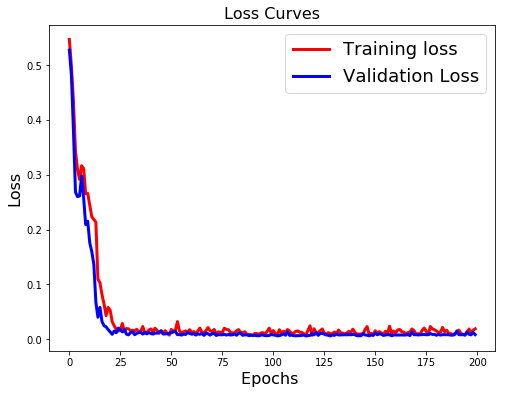

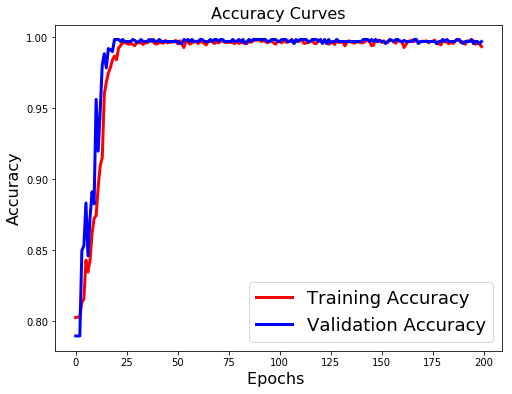

In [69]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history1.history['loss'],'r',linewidth=3.0)
plt.plot(history1.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history1.history['acc'],'r',linewidth=3.0)
plt.plot(history1.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [70]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
Y_pred = model1.predict(test_data)
print (Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print (y_pred)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

[[1.1389187e-03 9.9859267e-01]
 [1.5906888e-03 9.9840933e-01]
 [9.9998188e-01 2.1471837e-05]
 ...
 [9.9998188e-01 2.1471837e-05]
 [9.9998188e-01 2.1471837e-05]
 [9.9998188e-01 2.1471837e-05]]
[1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       551
           1       0.99      1.00      0.99       147

   micro avg       1.00      1.00      1.00       698
   macro avg       0.99      1.00      1.00       698
weighted avg       1.00      1.00      1.00       698



In [79]:
X_samples = []
y_samples = []
folders = ['not_red', 'red']
for label, folder in enumerate(folders):
    print (label, folder)
    for i, img in enumerate(glob.glob('/home/santosh/DL/traffic_lights/dataset/test/'+folder+'/*.jpg')):
        #print (i)
        image = cv2.imread(img)
        X_samples.append(image)
        y_samples.append(label)

0 not_red
1 red


In [80]:
X_samples = np.asarray(X_samples)
y_samples = np.asarray(y_samples)
print (X_samples.shape)
print (y_samples.shape)
# Change to float datatype
X_samples = X_samples.astype('float32')


# Scale the data to lie between 0 to 1
X_samples /= 255

(10, 256, 256, 3)
(10,)


In [81]:
samples_labels_one_hot = to_categorical(y_samples)

In [82]:
print (samples_labels_one_hot)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [83]:
model1.evaluate(X_samples, samples_labels_one_hot)

10/10 [==============================] - 0s 1ms/step


[0.007733844220638275, 1.0]

In [84]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
Y_pred = model1.predict(X_samples)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_samples, y_pred))

Confusion Matrix
[[5 0]
 [0 5]]


In [85]:
model1.save('traffic_lights.h5')